# An√°lise de Campe√µes de League of Legends

Este notebook realiza uma an√°lise detalhada dos campe√µes em League of Legends com base em atributos como Base HP, Mana, dificuldade e custo (Blue Essence e RP). A an√°lise visa explorar a rela√ß√£o entre esses atributos, a data de lan√ßamento e as diferentes fun√ß√µes desempenhadas pelos campe√µes (Top, Jungle, Middle, Bottom e Support).

Objetivos principais:
- Analisar a distribui√ß√£o de campe√µes por classe e fun√ß√£o.
- Explorar a rela√ß√£o entre o custo e a dificuldade dos campe√µes.
- Identificar correla√ß√µes entre atributos e o tempo de lan√ßamento.


In [1]:
# Importa√ß√£o de bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_excel('/kaggle/input/league-of-legends-dataset/League of legend Champions 2024.xlsx')

## Conhecendo os Dados e Explorando

Os dados incluem informa√ß√µes detalhadas sobre cada campe√£o, como:
- `Name`: Nome do campe√£o.
- `Nick Name`: Apelido do campe√£o.
- `Classes`: A classe a que o campe√£o pertence (ex: Marksman, Assassin).
- `Release Date`: Data de lan√ßamento do campe√£o.
- `Blue Essence` e `RP`: Custos do campe√£o em Blue Essence e Riot Points.
- `Base HP` e `Base Mana`: Atributos base do campe√£o.

Agora, buscaremos mais informa√ß√µes desses dados


In [3]:
df.head()

df.info()

df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           168 non-null    object
 1   Nick Name      168 non-null    object
 2   Classes        168 non-null    object
 3   Release Date   168 non-null    object
 4   Last Changed   168 non-null    object
 5   Blue Essence   168 non-null    int64 
 6   RP             168 non-null    int64 
 7   Difficulty     168 non-null    object
 8   Role           168 non-null    object
 9   Range type     168 non-null    object
 10  Resourse type  168 non-null    object
 11  Base HP        168 non-null    int64 
 12  Base mana      168 non-null    int64 
dtypes: int64(4), object(9)
memory usage: 17.2+ KB


Name               Nick Name     Classes         Release Date  \
163    Zeri       The spark of zaun    Marksman  2022-01-20 00:00:00   
164   Ziggs  The hexplosives expert   Artillery  2012-02-01 00:00:00   
165  Zilean        The chronokeeper  Specialist  2009-04-18 00:00:00   
166     Zoe  The aspect of twilight       Burst  2017-11-21 00:00:00   
167    Zyra      Rise of the thorns     Catcher  2012-07-24 00:00:00   

    Last Changed  Blue Essence   RP         Difficulty           Role  \
163       V14.18          4800  880  Intermediate_Plus         Bottom   
164       V14.18          4800  880             Novice  Bottom,Middle   
165       V13.22          1350  585       Intermediate        Support   
166        V14.9          4800  880             Expert         Middle   
167       V14.15          3150  790  Intermediate_Plus        Support   

    Range type Resourse type  Base HP  Base mana  
163     Ranged          Mana      600        250  
164     Ranged          Mana      606        480  
165     Ranged          Mana      574        452  
166     Ranged          Mana      630        425  
167     Ranged          Mana      574        418

In [4]:
df['Release Date'] = pd.to_datetime(df['Release Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Name           168 non-null    object        
 1   Nick Name      168 non-null    object        
 2   Classes        168 non-null    object        
 3   Release Date   168 non-null    datetime64[ns]
 4   Last Changed   168 non-null    object        
 5   Blue Essence   168 non-null    int64         
 6   RP             168 non-null    int64         
 7   Difficulty     168 non-null    object        
 8   Role           168 non-null    object        
 9   Range type     168 non-null    object        
 10  Resourse type  168 non-null    object        
 11  Base HP        168 non-null    int64         
 12  Base mana      168 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 17.2+ KB


In [5]:
# Verificando valores nulos

df.isnull().sum()

Name             0
Nick Name        0
Classes          0
Release Date     0
Last Changed     0
Blue Essence     0
RP               0
Difficulty       0
Role             0
Range type       0
Resourse type    0
Base HP          0
Base mana        0
dtype: int64

In [6]:
# Corrigindo o 'Resourse type' para 'Resource Type'
df.rename(columns={'Resourse type': 'Resource Type'}, inplace=True)
df.head()


Name            Nick Name             Classes Release Date Last Changed  \
0   Aatrox     The darkin blade          Juggernaut   2013-06-13       V14.14   
1     Ahri  The nine-tailed fox               Burst   2011-12-14       V14.18   
2    Akali   The rogue assassin            Assassin   2010-05-11       V14.18   
3   Akshan   The rogue sentinel  Marksman  Assassin   2021-07-22       V14.14   
4  Alistar         The minotaur            Vanguard   2009-02-21       V14.16   

   Blue Essence   RP         Difficulty        Role Range type Resource Type  \
0          4800  880           Advanced         Top      Melee    Blood Well   
1          3150  790       Intermediate      Middle     Ranged          Mana   
2          3150  790             Expert  Top,Middle      Melee        Energy   
3          4800  880  Intermediate_Plus      Middle     Ranged          Mana   
4          1350  585             Novice     Support      Melee          Mana   

   Base HP  Base mana  
0      650          0  
1      590        418  
2      600        200  
3      630        350  
4      685        350

### Contagens de classes, posi√ß√µes e dificuldade dos campe√µes


In [7]:
count_classes = df['Classes'].value_counts()
print(count_classes)

Classes
Marksman                21
Vanguard                15
Diver                   15
Juggernaut              14
Specialist              14
Assassin                13
Skirmisher              13
Battlemage              11
Burst                   11
Enchanter                8
Catcher                  7
Artillery                5
Warden                   5
Burst  Enchanter         2
Assassin  Diver          2
Mage  Assassin           1
Marksman  Catcher        1
Warden  Skirmisher       1
Marksman  Assassin       1
Burst  Artillery         1
Burst  Catcher           1
Assassin  Catcher        1
Marksman  Enchanter      1
Burst  Skirmisher        1
Enchanter  Warden        1
Marksman  Artillery      1
Assassin  Skirmisher     1
Name: count, dtype: int64


In [8]:
role_count = df['Role'].value_counts()
print(role_count)

Role
Top                          27
Jungle                       26
Middle                       22
Support                      21
Bottom                       17
Middle,Support                7
Top,Middle                    5
Top,Jungle                    5
Jungle,Top                    4
Bottom,Support                4
Jungle,Middle                 3
Top,Support                   3
Support,Middle                3
Bottom,Middle                 2
Middle,Jungle                 2
Jungle,Support                2
Middle,Top                    2
Bottom,Top                    1
Middle,Bottom,Top             1
Top,Middle,Bottom             1
Top,Jungle,Support            1
Middle,Support,Top            1
Bottom,Top,Middle             1
Top,Support,Jungle,Middle     1
Support,Jungle                1
Top,Middle,Support            1
Support,Top,Middle            1
Jungle,Top,Middle             1
Jungle,Support,Middle         1
Jungle,Top,Support            1
Name: count, dtype: int64


In [9]:
difficulty_count = df['Difficulty'].value_counts()

print(difficulty_count)

Difficulty
Novice               43
Intermediate         38
Beginner             29
Intermediate_Plus    28
Advanced             15
Expert               15
Name: count, dtype: int64


In [10]:
# An√°lise descritiva para atributos num√©ricos

df[['Base HP', 'Base mana', 'Blue Essence']].describe()

Base HP   Base mana  Blue Essence
count  168.000000  168.000000    168.000000
mean   617.791667  314.547619   3156.755952
std     39.358608  122.340734   1733.155630
min    410.000000    0.000000    450.000000
25%    595.750000  280.000000   1350.000000
50%    625.000000  331.500000   3150.000000
75%    645.000000  400.000000   4800.000000
max    696.000000  530.000000   7800.000000

## EDA - Distribui√ß√£o de Atributos


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


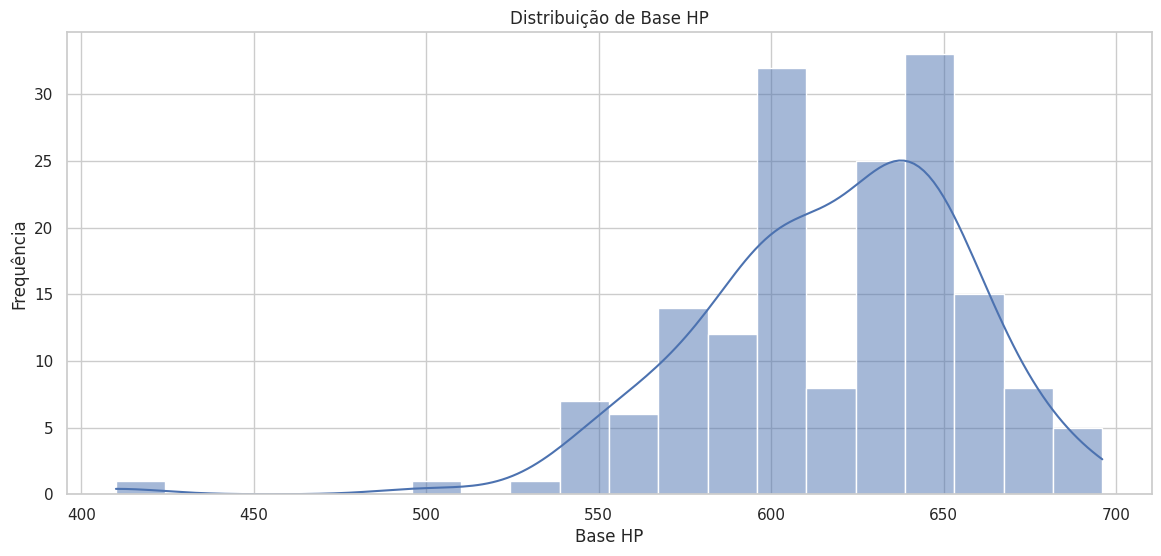

In [11]:
# Configura√ß√µes de estilo do Seaborn
sns.set(style="whitegrid")

# Histograma para Base HP
plt.figure(figsize=(14, 6))
sns.histplot(df['Base HP'], bins=20, kde=True)
plt.title('Distribui√ß√£o de Base HP')
plt.xlabel('Base HP')
plt.ylabel('Frequ√™ncia')
plt.show()

### Distribui√ß√£o de Base HP

A maioria dos campe√µes tem uma Base HP entre 590 e 645, com alguns campe√µes se destacando por ter HP significativamente acima ou abaixo dessa faixa. Essa varia√ß√£o pode refletir as diferentes classes dos campe√µes, como Juggernauts, que geralmente t√™m HP mais alto.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


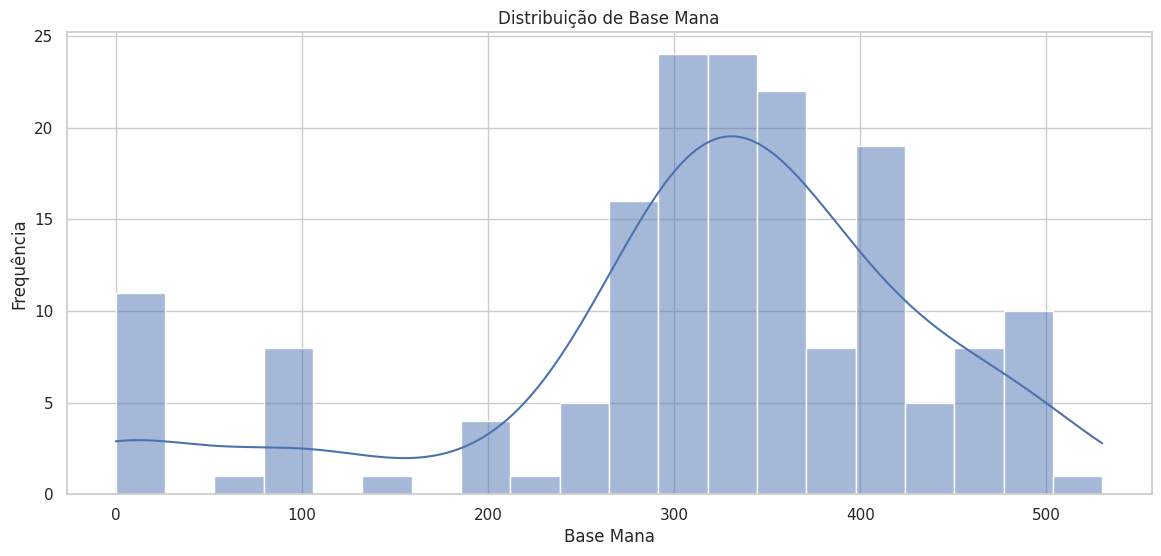

In [12]:
# Histograma para Base Mana
plt.figure(figsize=(14, 6))
sns.histplot(df['Base mana'], bins=20, kde=True)
plt.title('Distribui√ß√£o de Base Mana')
plt.xlabel('Base Mana')
plt.ylabel('Frequ√™ncia')
plt.show()

### Distribui√ß√£o de Base da Mana

Campe√µes com **Mana** variam mais, com alguns campe√µes n√£o usando Mana (valor 0) e outros com Mana muito alto. Isso geralmente depende da classe e estilo de jogo do campe√£o (ex: assassinos geralmente t√™m Mana menor, muitos nem possuindo essa caracter√≠stica).


In [13]:
# df['Classes'].info()
df['Classes'].unique()

array(['Juggernaut', 'Burst', 'Assassin', 'Marksman  Assassin',
       'Vanguard', 'Battlemage', 'Marksman', 'Mage  Assassin',
       'Specialist', 'Catcher', 'Skirmisher', 'Warden', 'Diver',
       'Assassin  Diver', 'Artillery', 'Enchanter', 'Marksman  Catcher',
       'Warden  Skirmisher', 'Burst  Enchanter', 'Burst  Artillery',
       'Burst  Catcher', 'Assassin  Catcher', 'Marksman  Enchanter',
       'Burst  Skirmisher', 'Enchanter  Warden', 'Marksman  Artillery',
       'Assassin  Skirmisher'], dtype=object)

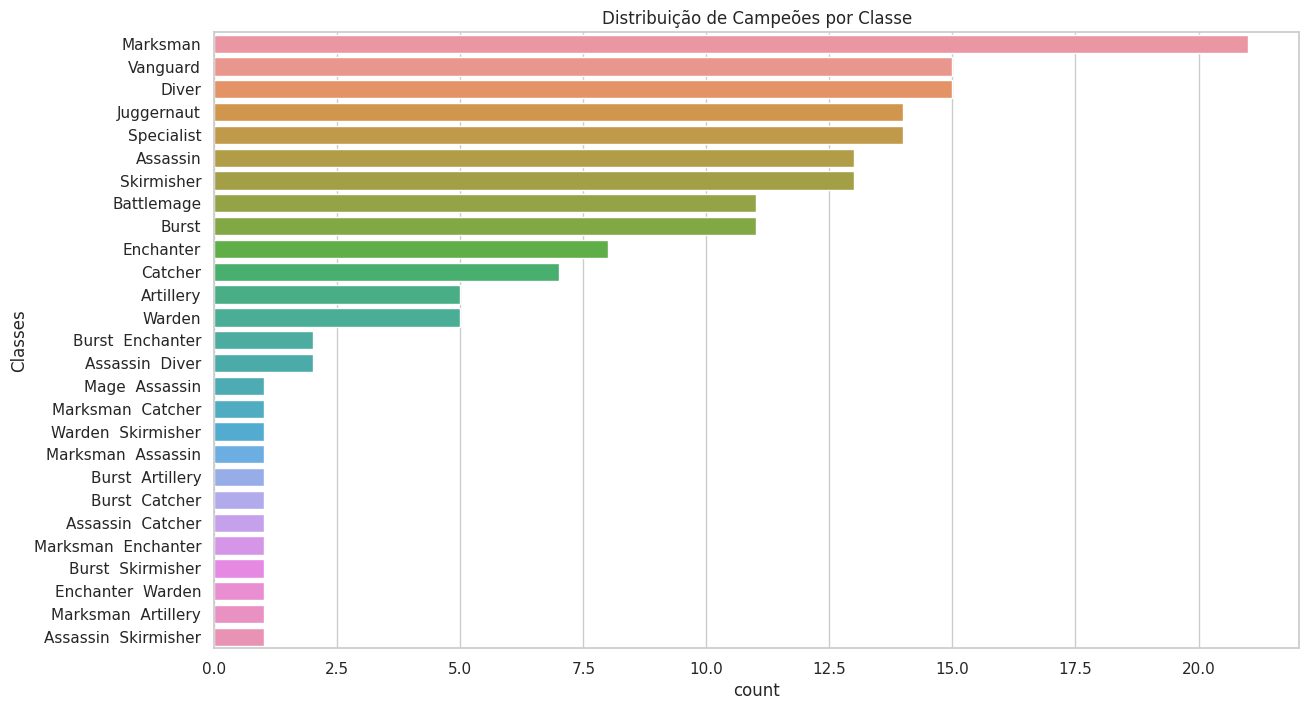

In [14]:
# Gr√°fico de barras para contagem de campe√µes por classe
plt.figure(figsize=(14, 8))
sns.countplot(y='Classes', data=df, order=df['Classes'].value_counts().index)
plt.title('Distribui√ß√£o de Campe√µes por Classe')
plt.show()


### Distribui√ß√£o de Campe√µes por Classe

A classe mais comum entre os campe√µes √© **Marksman**, o que reflete o papel importante desses campe√µes em composi√ß√µes de equipe, especialmente no **Bottom**. Outras classes, como **Juggernaut** e **Assassin**, tamb√©m s√£o bem representadas, sugerindo a diversidade de campe√µes e estilos de jogos diferentes.


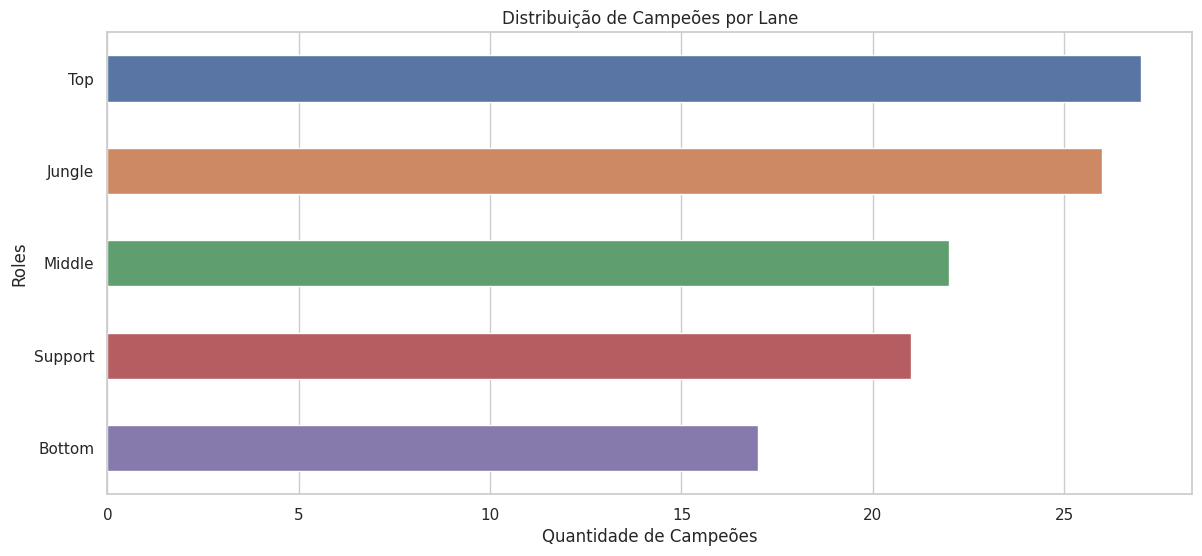

In [15]:
# Filtrar apenas as roles principais
roles_to_consider = ['Top', 'Jungle', 'Middle', 'Support', 'Bottom']
filtered_roles = df[df['Role'].isin(roles_to_consider)]

# Gr√°fico de barras para contagem de campe√µes por papel
plt.figure(figsize=(14, 6))
sns.countplot(y='Role', data=filtered_roles, order=filtered_roles['Role'].value_counts().index, width=0.5)
plt.title('Distribui√ß√£o de Campe√µes por Lane')
plt.ylabel('Roles')
plt.xlabel('Quantidade de Campe√µes')
plt.show()


A distribui√ß√£o de campe√µes por lanes fala por si s√≥. A lane com mais variedade de campe√µes lan√ßados √© o TOP enquanto os ADC's (bottom) ficam com os menores √≠ndices.

## Desempenho dos Campe√µes por Atributos e Lanes


In [16]:
# Agrupando por Classes e Roles e calcular a m√©dia dos atributos
status_agrupado = df.groupby(['Classes', 'Role'])[['Base HP', 'Base mana']].mean().reset_index()

# Visualizar as estat√≠sticas agrupadas
print(status_agrupado)


               Classes            Role     Base HP   Base mana
0            Artillery   Bottom,Middle  606.000000  480.000000
1            Artillery  Middle,Support  588.000000  440.000000
2            Artillery  Support,Middle  590.000000  469.000000
3            Artillery      Top,Middle  590.000000  375.000000
4             Assassin          Jungle  635.666667  296.666667
..                 ...             ...         ...         ...
76              Warden  Middle,Support  632.000000  500.000000
77              Warden         Support  610.000000  311.000000
78              Warden      Top,Jungle  610.000000  280.000000
79              Warden     Top,Support  625.000000  362.500000
80  Warden  Skirmisher          Bottom  640.000000  345.000000

[81 rows x 4 columns]


In [17]:
# Para a an√°lise de correla√ß√£o, vai ser necess√°rio colunas num√©ricas

# Converter Difficulty para num√©rico

difficulty_mapping = {
    'Novice': 1,
    'Intermediate': 2,
    'Intermediate_Plus': 3,
    'Advanced': 4,
    'Expert': 5
}
df['Difficulty Level'] = df['Difficulty'].map(difficulty_mapping)

# Converter 'Release Date' para num√©rico
df['Release Timestamp'] = df['Release Date'].astype('int64') // 10**9

# Selecionar colunas relevantes para correla√ß√£o
data_correlacao = df[['Difficulty Level', 'Base HP', 'Base mana', 'Release Timestamp']]

# Calcular a matriz de correla√ß√£o
matriz_correlacao = data_correlacao.corr()

# Exibir a matriz de correla√ß√£o
print(matriz_correlacao)


                   Difficulty Level   Base HP  Base mana  Release Timestamp
Difficulty Level           1.000000 -0.194914  -0.083710           0.132640
Base HP                   -0.194914  1.000000  -0.192757          -0.259707
Base mana                 -0.083710 -0.192757   1.000000           0.031319
Release Timestamp          0.132640 -0.259707   0.031319           1.000000


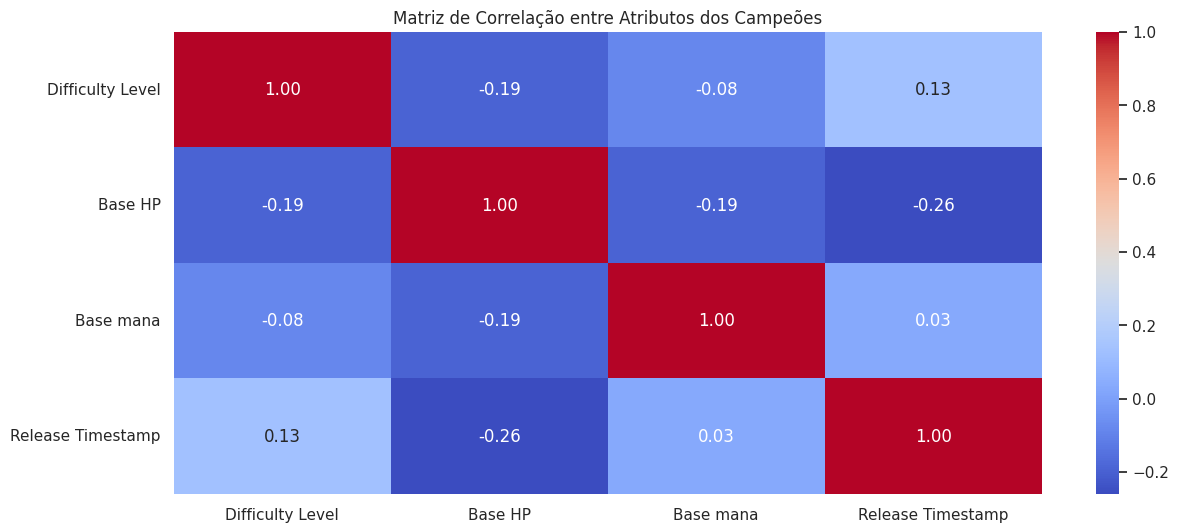

In [18]:
# Visualiza√ß√£o da matriz de correla√ß√£o

plt.figure(figsize=(14, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correla√ß√£o entre Atributos dos Campe√µes')
plt.show()


### Matriz de Correla√ß√£o entre Atributos dos Campe√µes

Aqui, podemos observar algumas correla√ß√µes interessantes:
- Uma correla√ß√£o negativa moderada entre **Base HP** e a data de lan√ßamento, o que indica que campe√µes mais recentes tendem a ter menos HP.
- A rela√ß√£o entre **Dificuldade** e **Base HP** √© levemente negativa, sugerindo que campe√µes mais dif√≠ceis de jogar tendem a ter menos HP, refletindo a mec√¢nica de alto risco e alta recompensa de campe√µes mais complexos.

**Por√©m**, vale mencionar que **n√£o** s√£o correla√ß√µes fortes, o que indica o esfor√ßo da equipe de balanceamento do jogo em manter os campe√µes equilibrados.


In [19]:
df['Last Changed'].unique()

array(['V14.14', 'V14.18', 'V14.16', 'V14.9', 'V13.22', 'V14.4', 'V14.12',
       'V14.15', 'V14.13', 'V14.11', 'V13.16', 'V14.2', 'V14.8', 'V14.10',
       'V14.7', 'V13.19', 'V14.3', 'V14.5', 'V14.6'], dtype=object)

## An√°lises mais profundas sobre a correla√ß√£o entre atributos (Dificuldade, Role, Base HP e/ou Mana).

In [20]:
# Matriz de sinergia de atributos (classes e role)

matriz_sinergia = filtered_roles.groupby(['Classes', 'Role']).size().unstack(fill_value=0)
print(matriz_sinergia)

Role                 Bottom  Jungle  Middle  Support  Top
Classes                                                  
Assassin                  0       3       4        0    1
Assassin  Catcher         0       0       0        1    0
Battlemage                0       0       7        0    0
Burst                     0       0       8        0    0
Burst  Enchanter          0       1       0        0    0
Catcher                   0       1       0        6    0
Diver                     0       8       0        0    2
Enchanter                 0       0       0        8    0
Juggernaut                1       1       0        0    9
Marksman                 11       0       1        0    3
Marksman  Artillery       1       0       0        0    0
Marksman  Assassin        0       0       1        0    0
Marksman  Catcher         1       0       0        0    0
Skirmisher                2       4       0        0    5
Specialist                0       5       1        1    5
Vanguard      

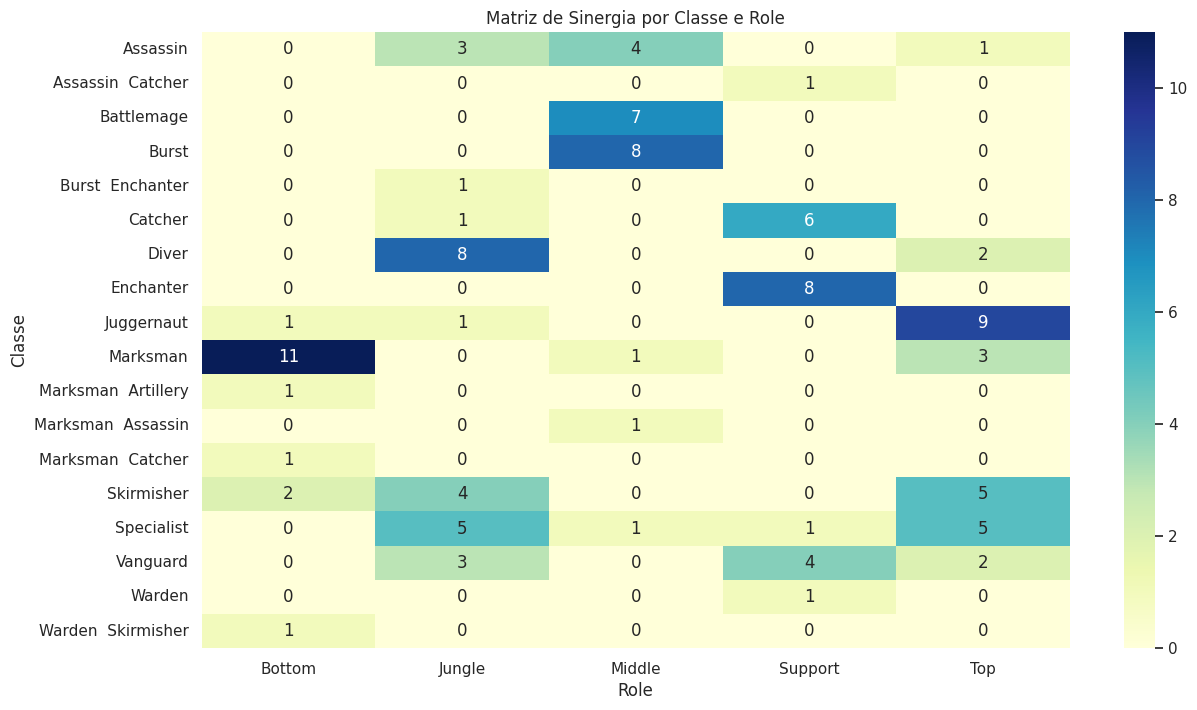

In [21]:
# Heatmap da matriz de sinergia 

plt.figure(figsize=(14, 8))
sns.heatmap(matriz_sinergia, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Matriz de Sinergia por Classe e Role')
plt.xlabel('Role')
plt.ylabel('Classe')
plt.show()


### Heatmap da Matriz de Sinergia
O heatmap da matriz de sinergia destaca a distribui√ß√£o dos campe√µes por classes e roles, sendo uma ferramenta √∫til para identificar sinergias em composi√ß√µes de equipe:
- **Classes como Marksman e Skirmisher** s√£o mais predominantes em lanes como Bottom e Jungle, respectivamente.
- **Campe√µes especializados** em roles como Support tendem a ser Catchers e Enchanters, enfatizando seu papel de suporte ao time.

**Entretanto**, algumas combina√ß√µes de classe e role s√£o menos comuns, como Artillery em Support e Vanguard em Middle, sugerindo que essas combina√ß√µes podem ser menos eficientes ou menos exploradas pelos jogadores.


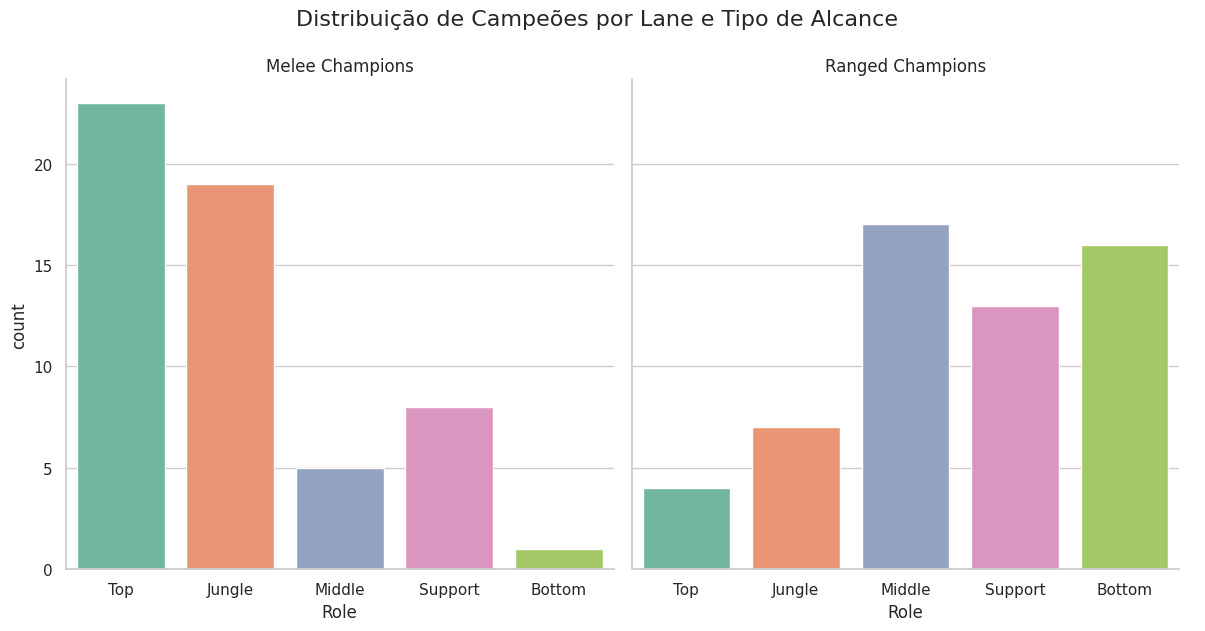

In [22]:
# Usar FacetGrid para visualizar campe√µes por Range Type
# Usei o 'filtered_roles' feito anteriormente para filtrar as Roles principais

g = sns.FacetGrid(df, col='Range type', height=6)
g.map(sns.countplot, 'Role', order=filtered_roles['Role'].value_counts().index, palette='Set2')
g.add_legend()
g.set_titles(col_template="{col_name} Champions")
g.fig.suptitle('Distribui√ß√£o de Campe√µes por Lane e Tipo de Alcance', fontsize=16, y=1.05)
plt.show()


### Distribui√ß√µes de Campe√µes por Lane e Tipo de Alcance
Aqui foi analisada a distribui√ß√£o dos campe√µes por lane (Top, Jungle, Middle, Support e Bottom) e tipo de alcance (Melee ou Ranged):
- **A maioria dos campe√µes com alcance Ranged** se concentra nas lanes Bottom (ADC) e Middle (MID), como esperado em posi√ß√µes que requerem combate √† dist√¢ncia.
- **Campe√µes de alcance Melee** s√£o predominantes em Jungle e Top, onde o combate corpo a corpo √© mais frequente.

Essa distribui√ß√£o reflete o meta do jogo e a adequa√ß√£o dos campe√µes ao estilo de jogo de cada lane.


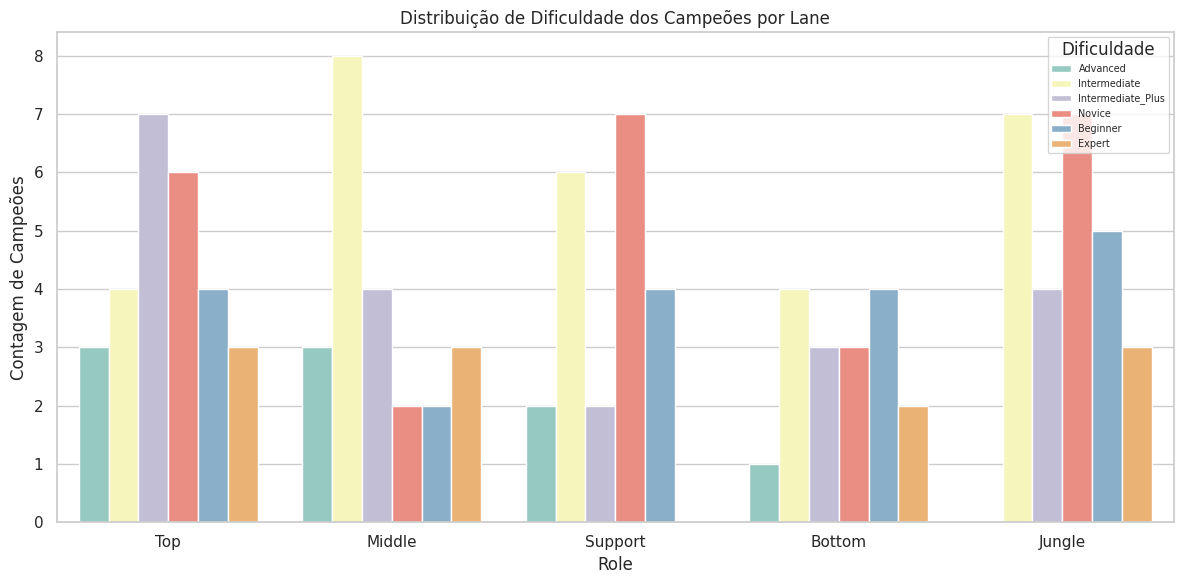

In [23]:
# Dificuldade de campe√µes por Role

# Gr√°fico de Dificuldade dos Campe√µes por Role
plt.figure(figsize=(12, 6))
sns.countplot(x='Role', hue='Difficulty', data=filtered_roles, palette='Set3')
plt.title('Distribui√ß√£o de Dificuldade dos Campe√µes por Lane')
plt.xlabel('Role')
plt.ylabel('Contagem de Campe√µes')

plt.legend(title='Dificuldade', loc='upper right', fontsize='xx-small')  # Mude 'upper right' para outra posi√ß√£o se necess√°rio

plt.tight_layout()
plt.show()

### Dificuldade de Campe√µes por Lane
A an√°lise da dificuldade dos campe√µes por lane revelou:
- **TOP** e **MID** possuem a maior concentra√ß√£o de campe√µes classificados como Expert ou Advanced, indicando que essas lanes podem exigir mais habilidade e experi√™ncia do jogador.
- **Lanes como SUP e ADC** t√™m mais campe√µes classificados como Novice, tornando-as lanes mais acess√≠veis para jogadores iniciantes.

**Ainda assim**, a presen√ßa de campe√µes dif√≠ceis em todas as lanes sugere que a dificuldade tamb√©m pode depender do estilo de jogo do jogador e n√£o somente da lane escolhida.


## Correla√ß√£o entre Custo e Data de Lan√ßamento

In [24]:
# Diferen√ßa entre data de lan√ßamento e hoje
df['Days Since Release'] = (datetime.datetime.now() - df['Release Date']).dt.days

# Calculando a correla√ß√£o
correlation = df['Blue Essence'].corr(df['Days Since Release'])
print(f"Correla√ß√£o entre Custo e Data de Lan√ßamento: {correlation}")

Correla√ß√£o entre Custo e Data de Lan√ßamento: -0.5335654677116215


### Correla√ß√£o entre Custo e Data de Lan√ßamento

A correla√ß√£o negativa de -0.5335 sugere que campe√µes lan√ßados mais recentemente tendem a ser mais caros em **Blue Essence**. Isso pode ser atribu√≠do √† tend√™ncia da Riot Games de lan√ßar campe√µes com pre√ßos mais altos para promover o uso de **Riot Points** nas primeiras semanas ap√≥s o lan√ßamento.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


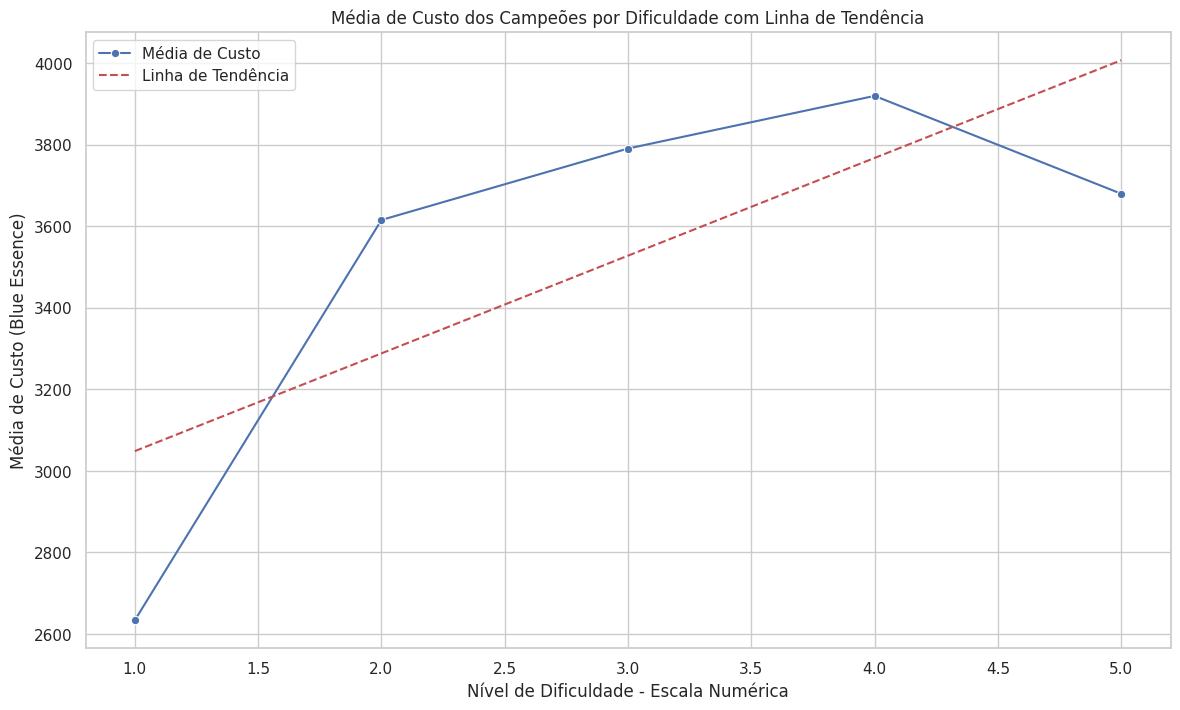

In [25]:
mean_cost_by_difficulty = df.groupby('Difficulty Level')['Blue Essence'].mean().reset_index()

# Gr√°fico de linha
plt.figure(figsize=(14,8))
sns.lineplot(x='Difficulty Level', y='Blue Essence', data=mean_cost_by_difficulty, marker='o', label='M√©dia de Custo')

# Adicionando uma linha de tend√™ncia (usando numpy para calcular a regress√£o linear)
z = np.polyfit(mean_cost_by_difficulty['Difficulty Level'], mean_cost_by_difficulty['Blue Essence'], 1)
p = np.poly1d(z)

# Plotando a linha de tend√™ncia
plt.plot(mean_cost_by_difficulty['Difficulty Level'], p(mean_cost_by_difficulty['Difficulty Level']), "r--", label='Linha de Tend√™ncia')

# Configura√ß√µes do gr√°fico
plt.xlabel('N√≠vel de Dificuldade - Escala Num√©rica')
plt.ylabel('M√©dia de Custo (Blue Essence)')
plt.title('M√©dia de Custo dos Campe√µes por Dificuldade com Linha de Tend√™ncia')
plt.legend()

plt.show()

### M√©dia de Dificuldade dos Custos dos Campe√µes com Linhas de Tend√™ncia
Aqui foi analisada a rela√ß√£o entre o custo dos campe√µes (Blue Essence) e seu n√≠vel de dificuldade:
- Existe uma **tend√™ncia de aumento no custo** dos campe√µes conforme a dificuldade aumenta, com campe√µes mais dif√≠ceis de jogar tendendo a custar **mais Blue Essence**.
- A linha de tend√™ncia refor√ßa essa rela√ß√£o, mostrando que campe√µes com maior n√≠vel de dificuldade frequentemente exigem mais recursos para serem adquiridos.

**Por√©m**, h√° exce√ß√µes a essa regra, com alguns campe√µes de dificuldade m√©dia apresentando custos elevados, o que pode estar relacionado ao tempo de lan√ßamento ou popularidade.

## Campe√µes mais caros por tipo de role

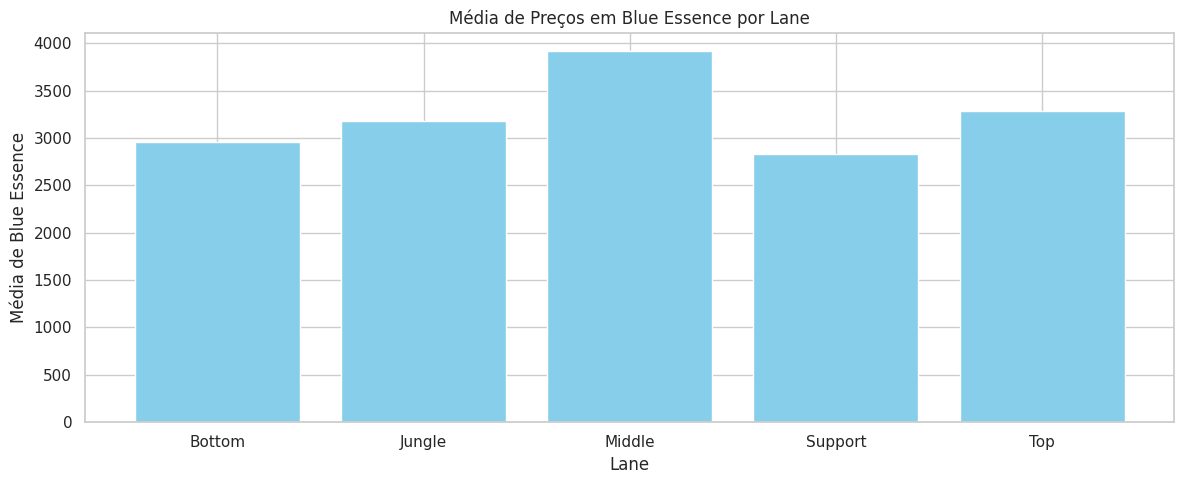

In [26]:
mean_prices = filtered_roles.groupby('Role')['Blue Essence'].mean().reset_index()

plt.figure(figsize=(12, 5))
plt.bar(mean_prices['Role'], mean_prices['Blue Essence'], color='skyblue')
plt.title('M√©dia de Pre√ßos em Blue Essence por Lane')
plt.xlabel('Lane')
plt.ylabel('M√©dia de Blue Essence')
plt.tight_layout()
plt.show()

### Campe√µes mais caros lan√ßados antes de 2018

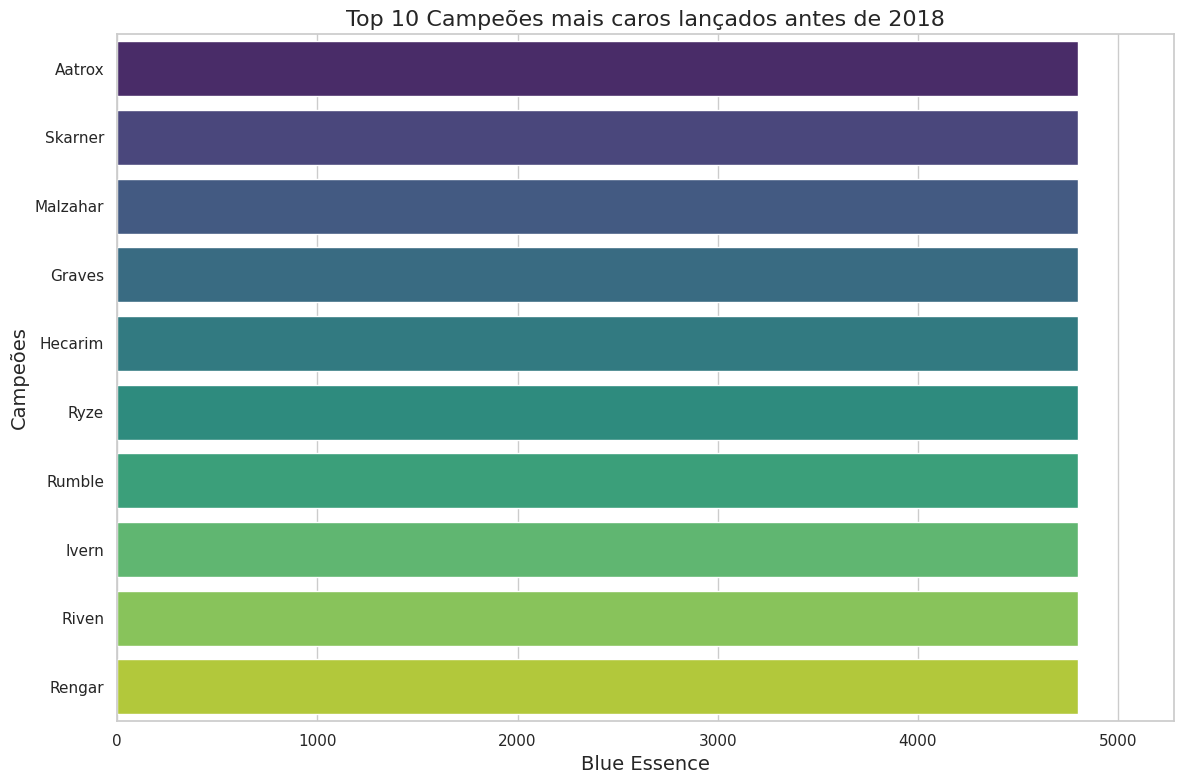

In [27]:
old_expensive_champions = df[df['Release Date'] < '2018-01-01'].sort_values(by='Blue Essence', ascending=False).head(10)

# Criando o gr√°fico de barras horizontal com cores personalizadas
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Blue Essence', y='Name', data=old_expensive_champions, palette='viridis')

plt.title('Top 10 Campe√µes mais caros lan√ßados antes de 2018', fontsize=16)
plt.xlabel('Blue Essence', fontsize=14)
plt.ylabel('Campe√µes', fontsize=14)
plt.xlim(0, max(old_expensive_champions['Blue Essence']) * 1.1) 
plt.tight_layout()
plt.show()

## Conclus√£o

üîç **Principais Descobertas**:

- **Classe em Alta**: A classe **Marksman** se destaca como a mais comum, especialmente na **botlane**. Juggernauts e Assassins tamb√©m t√™m uma presen√ßa significativa, revelando a diversidade de estilos de jogo.

- **Distribui√ß√£o por Lane**: A lane **Top** √© a mais variada em termos de campe√µes, enquanto o **Bot** se concentra mais nos Atiradores. Essa diversidade oferece v√°rias estrat√©gias para os jogadores.

- **Correla√ß√£o de Atributos**: Notamos uma correla√ß√£o negativa entre **Base HP** e a data de lan√ßamento. Campe√µes mais novos tendem a ter menos HP, possivelmente para manter o equil√≠brio no jogo. Campe√µes mais dif√≠ceis tamb√©m apresentam HP mais baixo, o que sugere um alto risco e alta recompensa nas mec√¢nicas de jogo.

- **Matriz de Sinergia**: O heatmap revela que **Marksman** e **Skirmisher** s√£o predominantes na **Botlane** e **Jungle**, enquanto **Support** geralmente tem campe√µes como **Catchers** e **Enchanters**. Sinergias s√£o fundamentais para composi√ß√µes de equipe!

- **Dificuldade por Lane**: **Top** e **Mid** possuem a maior concentra√ß√£o de campe√µes classificados como **Expert** ou **Advanced**. Lanes como **Support** e **ADC** s√£o mais acess√≠veis, tornando-as ideais para iniciantes.

- **Estrat√©gia de Monetiza√ß√£o**: A correla√ß√£o negativa entre **Custo** e **Data de Lan√ßamento** mostra que campe√µes mais novos custam mais em **Blue Essence**. Isso indica uma estrat√©gia da Riot Games para promover o uso de **Riot Points**.

- **Custo vs. Dificuldade**: Em geral, campe√µes mais dif√≠ceis custam mais, mas algumas exce√ß√µes existem. Isso pode estar ligado √† popularidade ou tempo de lan√ßamento.

üéÆ **Resumo**: Esta an√°lise revela a complexidade e o equil√≠brio em League of Legends, oferecendo insights valiosos para jogadores e desenvolvedores. A diversidade de campe√µes e o balanceamento entre custo e dificuldade garantem uma experi√™ncia rica e din√¢mica!

